In [186]:
# ============================================
# Portfolio Project: Chile GDP and Life Expectancy Analysis (2000–2016)
# ============================================

# -----------------------------
# 1. Title & Introduction
# -----------------------------
"""
# Exploring the Relationship Between Economic Growth and Life Expectancy in Chile (2000–2016)

This project analyzes Chile’s GDP and life expectancy trends, compares year-over-year growth rates, identifies divergence years, and models whether GDP predicts life expectancy. 

**Data Source:** CSV file with columns: Country, Year, Life expectancy at birth (years), GDP
"""

'\n# Exploring the Relationship Between Economic Growth and Life Expectancy in Chile (2000–2016)\n\nThis project analyzes Chile’s GDP and life expectancy trends, compares year-over-year growth rates, identifies divergence years, and models whether GDP predicts life expectancy. \n\n**Data Source:** CSV file with columns: Country, Year, Life expectancy at birth (years), GDP\n'

In [149]:
# -----------------------------
# 2. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [153]:
# -----------------------------
# 3. Data Import & Cleaning
# -----------------------------
# Load CSV
all_data = pd.read_csv("all_data.csv")

# Clean column names
all_data.columns = all_data.columns.str.strip()

# Filter for Chile and sort by year
chile_data = all_data[all_data['Country'] == "Chile"].sort_values('Year')

# Basic checks
display(chile_data.head())
display(chile_data.info())
display(chile_data.describe())

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           16 non-null     object 
 1   Year                              16 non-null     int64  
 2   Life expectancy at birth (years)  16 non-null     float64
 3   GDP                               16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


None

,Year,Life expectancy at birth (years),GDP
count,16.000000,16.000000,1.600000e+01
mean,2007.500000,78.943750,1.697888e+11
std,4.760952,1.058911,7.687884e+10
min,2000.000000,77.300000,6.973681e+10
25%,2003.750000,77.975000,9.387303e+10
50%,2007.500000,79.000000,1.729975e+11
75%,2011.250000,79.825000,2.449515e+11
max,2015.000000,80.500000,2.783840e+11


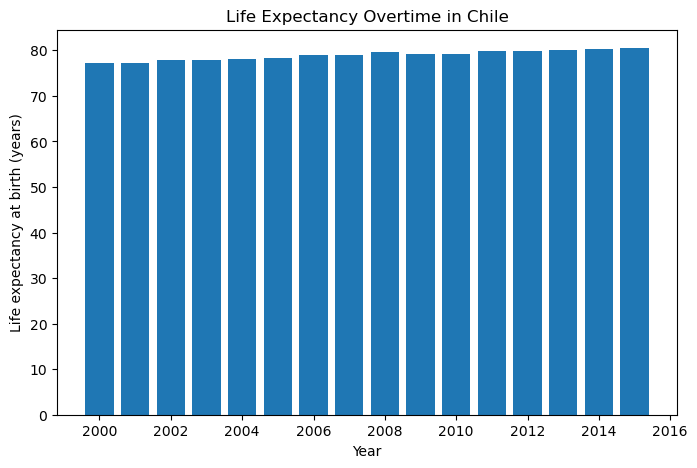

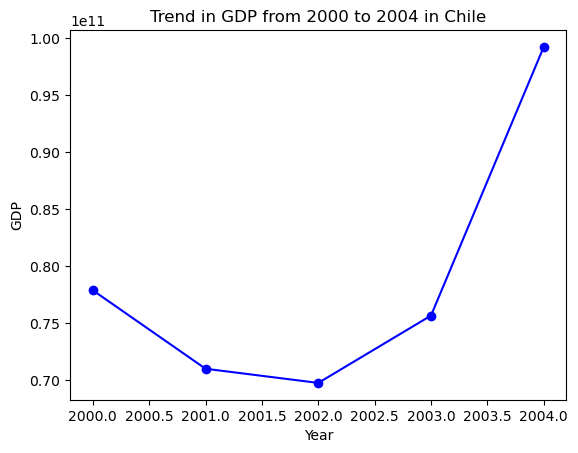

<Figure size 640x480 with 0 Axes>

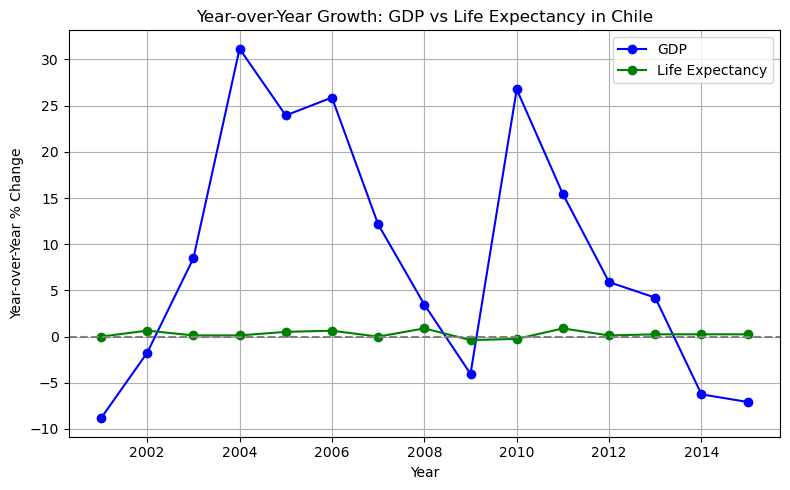

<Figure size 640x480 with 0 Axes>

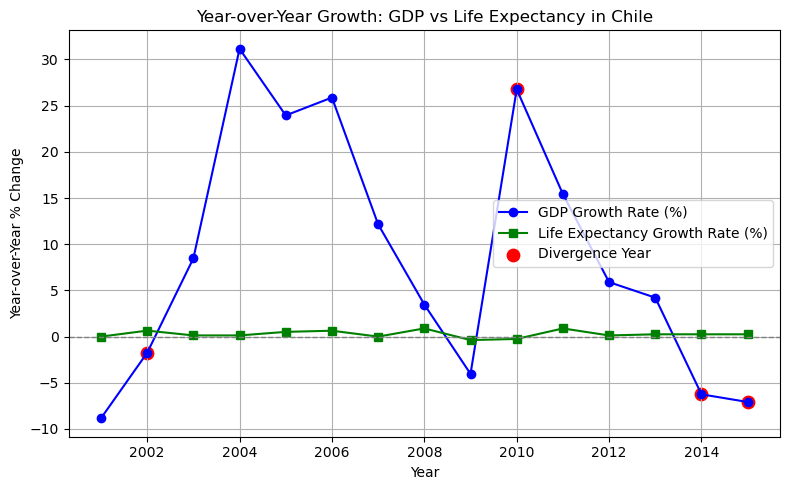

Year of max GDP growth: 2004, Growth rate: 31.16%


In [171]:
# -----------------------------
# 4. Exploratory Data Analysis (EDA)
# -----------------------------
#Life Expectancy over Time
plt.figure(figsize=(8,5))
plt.bar(chile_data['Year'], chile_data['Life expectancy at birth (years)'])
plt.title("Life Expectancy Overtime in Chile")
plt.xlabel("Year")
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

#GDP over time (2000-2004)
year_subset = chile_data[(chile_data['Year'] <= 2004) & (chile_data['Year']  >= 2000)]
plt.plot(year_subset['Year'], year_subset['GDP'], marker= 'o', color = 'blue')
plt.title("Trend in GDP from 2000 to 2004 in Chile")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()
plt.clf()

#Year-over-Year Growth Rates
chile_data['GDP_growth_rate'] = chile_data['GDP'].pct_change() * 100
chile_data['Life Expectancy Percent Change'] = chile_data['Life expectancy at birth (years)'].pct_change() * 100

plt.figure(figsize=(8,5))
plt.plot(chile_data['Year'], chile_data['GDP_growth_rate'], marker='o', color='blue')
plt.plot(chile_data['Year'], chile_data['Life Expectancy Percent Change'], marker='o', color='green')
plt.title('Year-over-Year Growth: GDP vs Life Expectancy in Chile')
plt.xlabel('Year')
plt.ylabel('Year-over-Year % Change')
plt.axhline(0, color='gray', linestyle='--')  # baseline for positive/negative growth
plt.legend(["GDP", "Life Expectancy"], loc = 1)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()


#Divergence Analysis
divergence1 = chile_data[(chile_data['GDP_growth_rate'] > 0) & (chile_data['Life Expectancy Percent Change'] < 0)]
divergence2 = chile_data[(chile_data['GDP_growth_rate'] < 0) & (chile_data['Life Expectancy Percent Change'] > 0)]

divergence_years = pd.concat([divergence1, divergence2])

plt.figure(figsize=(8,5))

plt.plot(chile_data['Year'], chile_data['GDP_growth_rate'], marker='o', color='blue', label='GDP Growth Rate (%)')
plt.plot(chile_data['Year'], chile_data['Life Expectancy Percent Change'], marker='s', color='green', label='Life Expectancy Growth Rate (%)')

# Highlight divergence
plt.scatter(divergence_years['Year'], divergence_years['GDP_growth_rate'], color='red', s=80, label='Divergence Year')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Year-over-Year % Change')
plt.title('Year-over-Year Growth: GDP vs Life Expectancy in Chile')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


max_growth_row = chile_data.loc[chile_data['GDP_growth_rate'].idxmax()]

year_of_max_growth = max_growth_row['Year']
max_growth_value = max_growth_row['GDP_growth_rate']

print(f"Year of max GDP growth: {year_of_max_growth}, Growth rate: {max_growth_value:.2f}%")


Slope: 0.000000
Intercept: 76.72
R-squared: 0.902
P-value: 0.0000


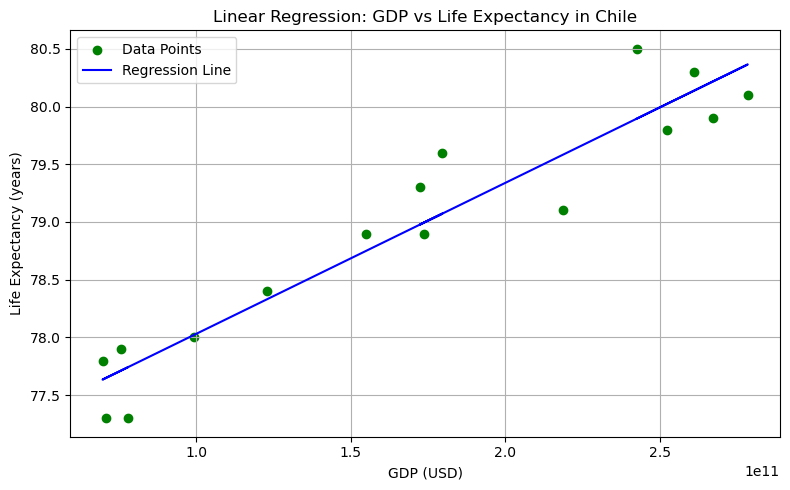

In [159]:
# -----------------------------
# 5. Linear Regression: Does GDP Predict Life Expectancy?
# -----------------------------

slope, intercept, r_value, p_value, std_err = stats.linregress(chile_data['GDP'], chile_data['Life expectancy at birth (years)'])

print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4f}")
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, intercept + slope*x, color='blue', label='Regression Line')

plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (years)')
plt.title('Linear Regression: GDP vs Life Expectancy in Chile')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

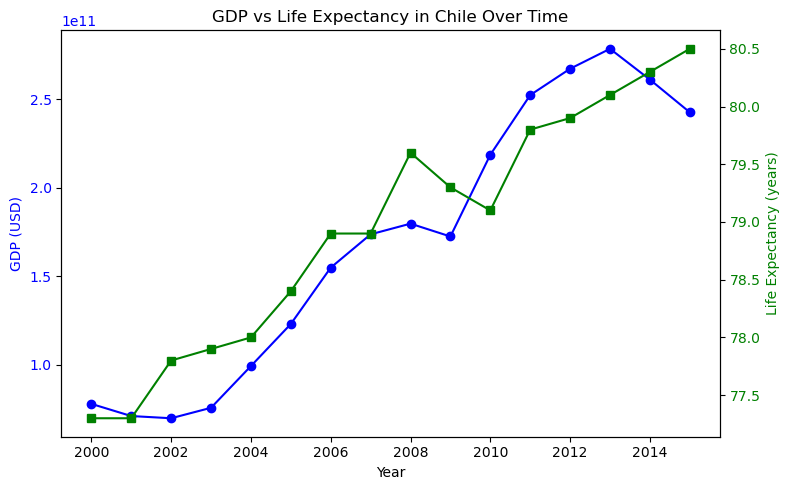

In [160]:
# -----------------------------
# 6. Dual-Axis Chart: GDP vs Life Expectancy
# -----------------------------
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(chile_data['Year'], chile_data['GDP'], color='blue', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(chile_data['Year'], chile_data['Life expectancy at birth (years)'], color='green', marker='s', label='Life Expectancy')
ax2.set_ylabel('Life Expectancy (years)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('GDP vs Life Expectancy in Chile Over Time')
fig.tight_layout()
plt.show()

In [181]:
# -----------------------------
# 7. Predictive Modeling of Life Expectancy
# -----------------------------
recent_GDP_Chile = int(330.27e9)
predicted_life_expectancy = slope*recent_GDP_Chile + intercept
print(f"End of 2024 predicted Chile Life Expectancy based on GDP: {predicted_life_expectancy:.1f}")



End of 2024 predicted Chile Life Expectancy based on GDP: 81.0


In [184]:
# -----------------------------
# 8. Insights & Interpretation
# -----------------------------
"""
### Key Findings:
- Life expectancy increased steadily from 77.3 to 78 years (2000–2004), while GDP fluctuated more sharply.
- Largest GDP growth year: Year 2004 with a growth rate of 31.16%
- Divergence observed in years: 2002, 2010, 2014, 2015.
- Linear regression indicates a strong positive relationship between GDP and life expectancy (R² = 0.902).
- End of 2024 predicted Chile Life Expectancy based on GDP: 81.0 years old
- Visualization suggests economic growth generally aligns with life expectancy improvements, but short-term divergences exist.
"""

'\n### Key Findings:\n- Life expectancy increased steadily from 77.3 to 78 years (2000–2004), while GDP fluctuated more sharply.\n- Largest GDP growth year: Year 2004 with a growth rate of 31.16%\n- Divergence observed in years: 2002, 2010, 2014, 2015.\n- Linear regression indicates a strong positive relationship between GDP and life expectancy (R² = 0.902).\n- End of 2024 predicted Chile Life Expectancy based on GDP: 81.0 years old\n- Visualization suggests economic growth generally aligns with life expectancy improvements, but short-term divergences exist.\n'